Adapted from [Image Processing Cookbook](https://github.com/PacktPublishing/Python-Image-Processing-Cookbook) and [Hands On Image Processing with Python](https://github.com/PacktPublishing/Hands-On-Image-Processing-with-Python)

In [0]:
!apt-get -qq install -y libsm6 libxext6
!pip install imgaug==0.2.7
!pip install -q -U opencv-python




In [0]:
% matplotlib inline
from matplotlib import pylab as pylab
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, SimilarityTransform, AffineTransform, resize
import cv2
import numpy as np
from skimage import data
from skimage.util import img_as_float
from skimage.exposure import rescale_intensity
from skimage.measure import ransac

In [0]:
!git clone https://github.com/PacktPublishing/Hands-On-Image-Processing-with-Python.git

Cloning into 'Hands-On-Image-Processing-with-Python'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 725 (delta 1), reused 1 (delta 0), pack-reused 719
Receiving objects: 100% (725/725), 237.23 MiB | 34.00 MiB/s, done.
Resolving deltas: 100% (146/146), done.
Checking out files: 100% (182/182), done.


In [0]:
!git clone https://github.com/PacktPublishing/Python-Image-Processing-Cookbook.git

Cloning into 'Hands-On-Image-Processing-with-Python'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 725 (delta 1), reused 1 (delta 0), pack-reused 719
Receiving objects: 100% (725/725), 237.23 MiB | 34.00 MiB/s, done.
Resolving deltas: 100% (146/146), done.
Checking out files: 100% (182/182), done.


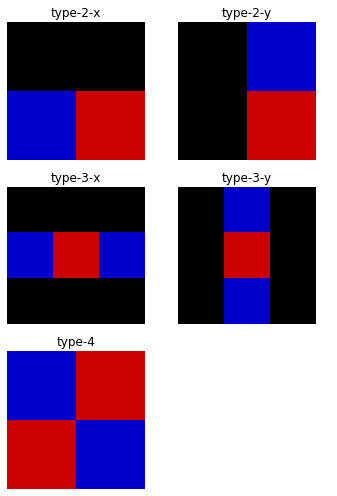

((0.0, 1.0, 0.0, 1.0), None, None)

In [0]:
from skimage.feature import haar_like_feature_coord
from skimage.feature import draw_haar_like_feature
images = [np.zeros((2, 2)), np.zeros((2, 2)), np.zeros((3, 3)),
np.zeros((3, 3)), np.zeros((2, 2))]
feature_types = ['type-2-x', 'type-2-y', 'type-3-x', 'type-3-y', 'type-4']
fig, axes = pylab.subplots(3, 2, figsize=(5,7))
for axes, img, feat_t in zip(np.ravel(axes), images, feature_types):
    coordinates, _ = haar_like_feature_coord(img.shape[0], img.shape[1], feat_t)
    haar_feature = draw_haar_like_feature(img, 0, 0, img.shape[0],img.shape[1], coordinates, max_n_features=1, random_state=0, color_positive_block=(1.0, 0.0, 0.0), color_negative_block=(0.0, 0.0, 1.0), alpha=0.8)
    axes.imshow(haar_feature), axes.set_title(feat_t), axes.set_axis_off()
#fig.suptitle('Different Haar-like feature descriptors')
pylab.axis('off'), pylab.tight_layout(), pylab.show()

In [0]:
!ls /content/Hands-On-Image-Processing-with-Python/

 Chapter01   Chapter06	 Chapter11    README.md
 Chapter02   Chapter07	 Chapter12   'Solutions to selected exercises.ipynb'
 Chapter03   Chapter08	 Errata.pdf   TOC.pdf
 Chapter04   Chapter09	 images
 Chapter05   Chapter10	 LICENSE


In [0]:
IMAGE_DIR = '/content/Hands-On-Image-Processing-with-Python/images/'
DATA_DIR = '/content/Hands-On-Image-Processing-with-Python/Chapter07/'

In [0]:
face_cascade = cv2.CascadeClassifier(DATA_DIR + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(DATA_DIR + 'haarcascade_eye.xml')

1
[[ 9 13 24 24]
 [37 15 22 22]]


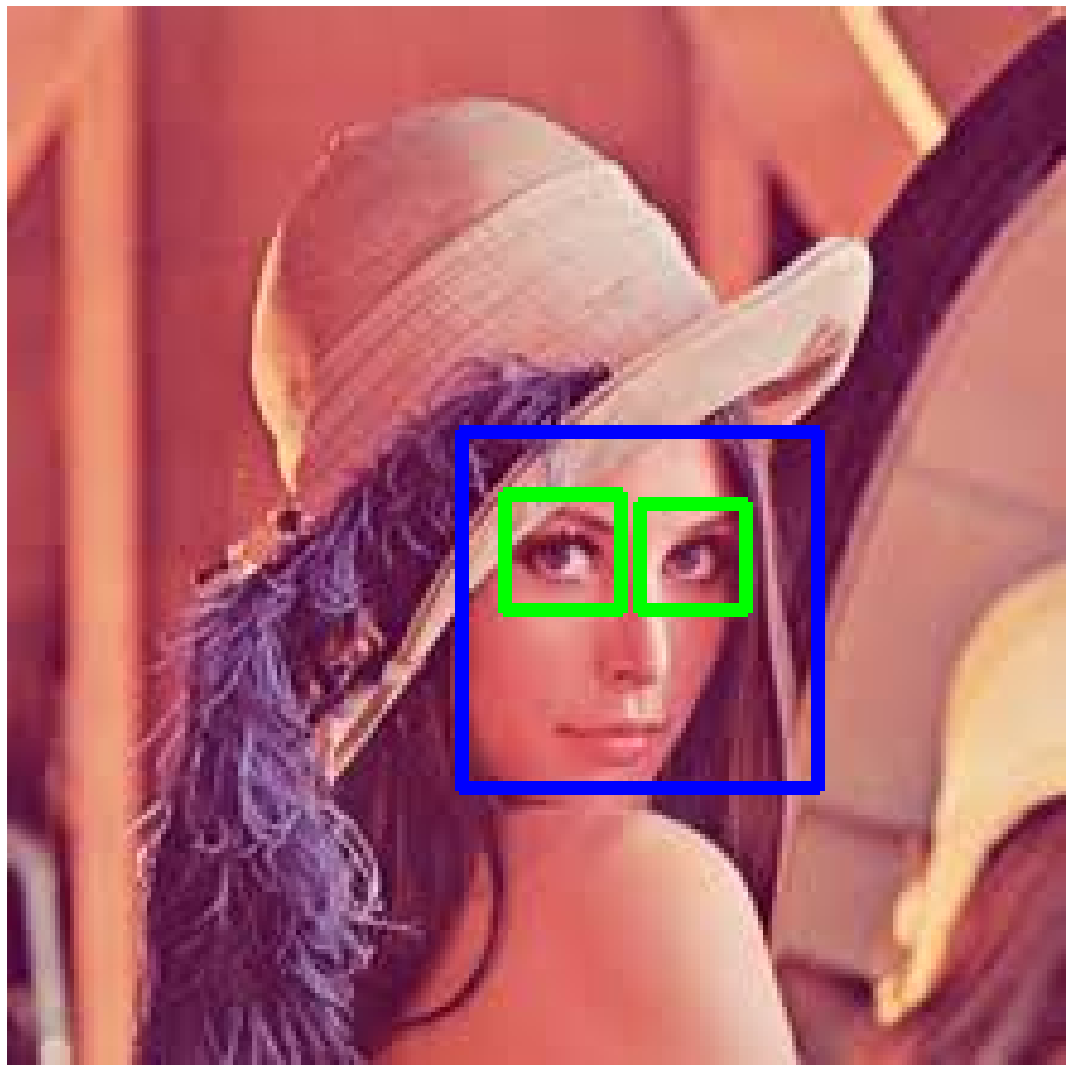

In [0]:
img = cv2.imread(IMAGE_DIR + 'lena.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.2, 5) # scaleFactor=1.2, minNbr=5
print(len(faces)) # number of faces detected
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    print(eyes) # location of eyes detected
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure(figsize=(15,20))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.axis('off')
plt.tight_layout()
plt.show()

In [0]:
DATA_DIR = '/content/Python-Image-Processing-Cookbook/Chapter 08/'

7


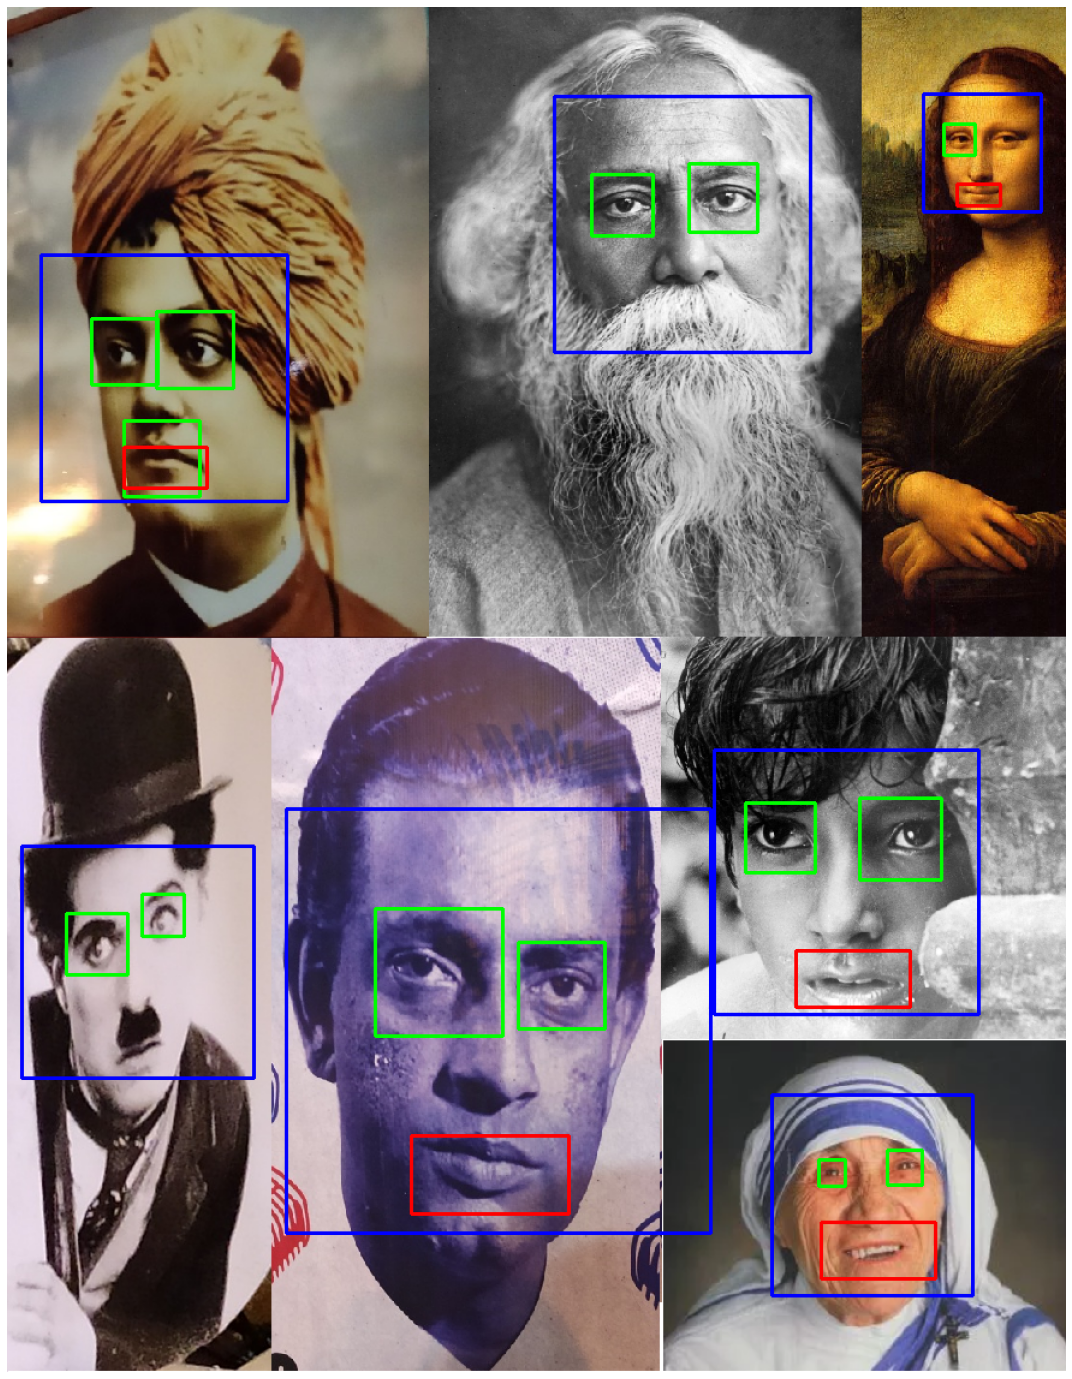

In [0]:
import cv2
import numpy as np
import matplotlib.pylab as plt

face_cascade = cv2.CascadeClassifier(DATA_DIR + 'models/face_detect/haarcascade_frontalface_alt2.xml')
eye_cascade = cv2.CascadeClassifier(DATA_DIR + 'models/face_detect/haarcascade_eye.xml') # haarcascade_eye_tree_eyeglasses.xml
smile_cascade = cv2.CascadeClassifier(DATA_DIR + 'models/face_detect/haarcascade_smile.xml')

img = cv2.imread(DATA_DIR + 'images/all.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.01, 8) # scaleFactor=1.2, minNbr=5
print(len(faces)) # number of faces detected
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.04, 10)
    #print(eyes) # location of eyes detected
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    smile = smile_cascade.detectMultiScale(roi_gray, 1.38, 6)
    for (mx,my,mw,mh) in smile:
        cv2.rectangle(roi_color,(mx,my),(mx+mw,my+mh),(0,0,255),2)
       
plt.figure(figsize=(15,20))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.axis('off')
plt.tight_layout()
plt.show()

In [0]:
opencv_haar_path = 'Hands-On-Image-Processing-with-Python/Chapter07/'
face_cascade = cv2.CascadeClassifier(opencv_haar_path + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(opencv_haar_path + 'haarcascade_eye.xml')
#eye_cascade = cv2.CascadeClassifier(opencv_haar_path + 'haarcascade_eye_tree_eyeglasses.xml') # eye with glasses

In [0]:
print(opencv_haar_path + 'haarcascade_frontalface_default.xml')

Hands-On-Image-Processing-with-Python/Chapter07/haarcascade_frontalface_default.xml


In [0]:
IMAGE_DIR = '/content/Hands-On-Image-Processing-with-Python/images/'

In [0]:
img = imread(IMAGE_DIR + 'lena.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.2, 5) # scaleFactor=1.2, minNbr=5
print(len(faces)) # number of faces detected

1
